## 8.1 useState
- 함수 컴포넌트에서도 가변적인 상태를 지닐 수 있게 함
    ```js
    import { useState } from 'react';

    const Counter = () => {
        const [value, setValue] = useState(0)

        return (
            <div>
                <p>
                    현재 카운터 값은 <b>{value}</b> 입니다.
                </p>
                <button onClick={() => setValue(value + 1)}>+1</button>
                <button onClick={() => setValue(value - 1)}>-1</button>
            </div>
        );
    };

    export default Counter;
    ```

    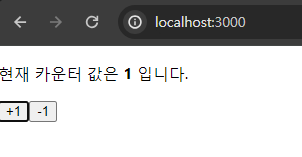
    

## 8.2 useEffect
- 리액트 컴포넌트가 렌더링될 때마다 특정 작업을 수행하도록 설정할 수 있다.
```js
import { useState, useEffect } from 'react'

const Info = () => {
    const [ name, setName ] = useState('');
    const [ nickname, setNickname ] = useState('');
    // useEffect(() => {
    //     console.log('렌더링이 완료')
    //     console.log({
    //         name,
    //         nickname
    //     })
    // })
    useEffect(() => {
        console.log('마운트 될 때만 실행')
    }, [])

    const onChangeName = e => {
        setName(e.target.value)
    }

    const onChangeNickname = e => {
        setNickname(e.target.value)
    }

    return (
        <div>
            <div>
                <input value={name} onChange={onChangeName} />      
                <input value={nickname} onChange={onChangeNickname} />      
            </div>
            <div>
                <div>
                    <b>이름 :</b> {name}
                </div> 
                <div>
                    <b>닉네임 :</b> {nickname}
                </div> 
            </div>
        </div>
    );
};

export default Info;
```
- 주석 코드

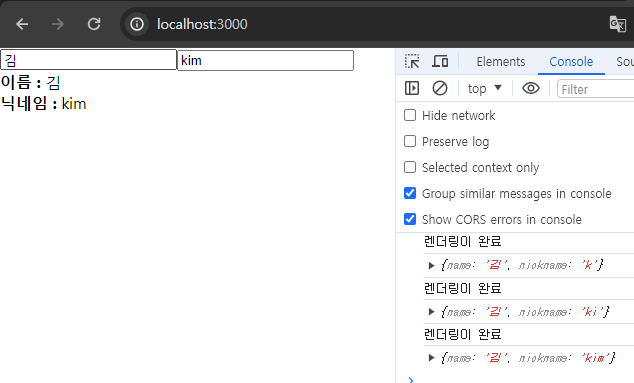

- 코드

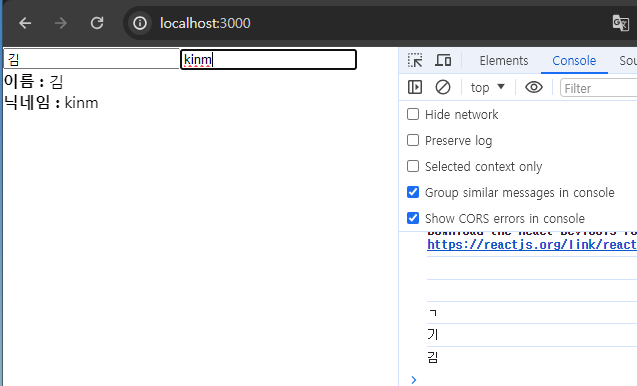


- useEffect는 기본적으로 렌더링 되고 난 직후마다 실행, 두 번째 파라미터 배열에 무엇을 넣는지에 따라 실행되는 조건이 달라진다.
```js
import { useState, useEffect } from 'react'

const Info = () => {
    const [ name, setName ] = useState('');
    const [ nickname, setNickname ] = useState('');

    // useEffect(() => {
    //     console.log('effect')
    //     console.log(name)
    //     return () => {
    //         console.log('cleanup')
    //         console.log(name)
    //     }
    // }, [name])
    useEffect(() => {
        console.log('effect')
        return () => {
            console.log('unmount')
        }
    }, [])

    const onChangeName = e => {
        setName(e.target.value)
    }

    const onChangeNickname = e => {
        setNickname(e.target.value)
    }

    return (
        <div>
            <div>
                <input value={name} onChange={onChangeName} />      
                <input value={nickname} onChange={onChangeNickname} />      
            </div>
            <div>
                <div>
                    <b>이름 :</b> {name}
                </div> 
                <div>
                    <b>닉네임 :</b> {nickname}
                </div> 
            </div>
        </div>
    );
};

export default Info;
```
```js
import {useState} from 'react'
import Info from './Info';

const App = () => {
  const [visible, setVisible] = useState(false)

  return (
    <div>
      <button
        onClick={()=> {
          setVisible(!visible)
        }}
      >
        {visible ? '숨기기' : '보이기'}
      </button> 
      <hr />
      {visible && <Info />}
    </div>
  )
};

export default App;
```
- 주석 코드

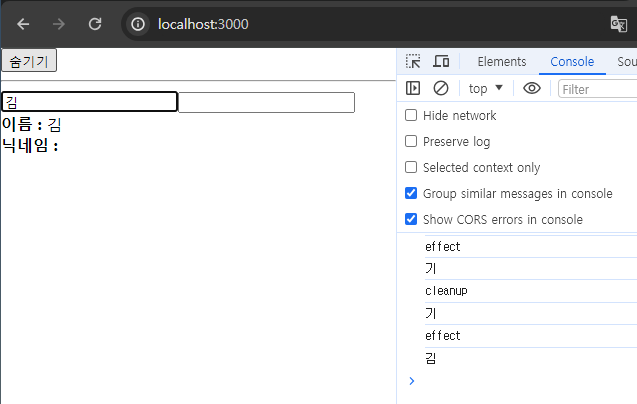

- 기본 코드
    - 언마운트 될 때만 뒷정리 함수 호출


## 8.3 useReducer
- 다양한 컴포넌트 상황에 따라 다양한 상태를 다른 값으로 업데이트 해주고 싶을 때 사용
- 리듀서는 현재 상태, 업데이트를 위해 필요한 정보를 담은 액션 값을 전달 받아 새로운 상태를 반환하는 함수
- 반드시 불변성을 지켜주어야 한다!
```js
import { useReducer } from 'react';

function reducer(state, action) {
    // action.type 에 따라 다른 작업 수행
    switch (action.type) {
        case 'INCREMENT':
        return { value: state.value + 1 };
        case 'DECREMENT':
        return { value: state.value - 1 };
        default:
        // 아무것도 해당되지 않을 때 기존 상태 반환
        return state;
    }
}

const Counter = () => {
    const [state, dispatch] = useReducer(reducer, { value: 0 });

    return (
        <div>
            <p>
                현재 카운터 값은 <b>{state.value}</b> 입니다.
            </p>
            <button onClick={() => dispatch({ type: 'INCREMENT' })}>+1</button>
            <button onClick={() => dispatch({ type: 'DECREMENT' })}>-1</button>
        </div>
    );
};

export default Counter;
```
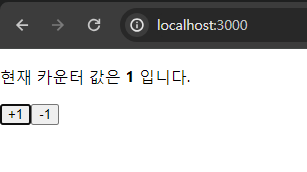


- 기존에는 인풋이 여러 개여서 useState를 여러 번 사용했지만 useReducer를 사용하면 기존에 클래스형 컴포넌트에서 input 태그에 name 값을 할당하고 e.target.name을 참조하여 setState 해준 것과 유사한 방식으로 작업 철
- useReducer에서의 액션은 어떤 값도 사용 가능
```js
import { useReducer } from 'react'

function reducer(state, action) {
    return {
        ...state,
        [action.name]: action.value
    }
}

const Info = () => {
    const [state, dispatch] = useReducer(reducer, {
        name:'',
        nickname:''
    })
    const { name, nickname } = state
    const onChange = e => {
        dispatch(e.target)
    }

    return (
        <div>
            <div>
                <input name="name" value={name} onChange={onChange} />      
                <input name="nickname" value={nickname} onChange={onChange} />      
            </div>
            <div>
                <div>
                    <b>이름 :</b> {name}
                </div> 
                <div>
                    <b>닉네임 :</b> {nickname}
                </div> 
            </div>
        </div>
    );
};

export default Info;
```

## 8.4 useMemo
- 함수 컴포넌트 내부에서 발생하는 연산을 최적화할 수 있다

- 숫자를 등록할 때 뿐만 아니라 인풋 내용이 수정될 때도 getAverage함수가 호출됨
- 최적화 하기위해 useMemo 사용
```js
import{ useState } from 'react';

const getAverage = numbers => {
    console.log('평균값 계산');
    if (numbers.length === 0) return 0;
    const sum = numbers.reduce((a, b) => a + b);
    return sum / numbers.length;
};

const Average = () => {
    const [list, setList] = useState([]);
    const [number, setNumber] = useState('');

    const onChange = e => {
        setNumber(e.target.value)
    }
    const onInsert = e => {
        const nextList = list.concat(parseInt(number))
        setList(nextList)
        setNumber('')
    }

    return (
        <div>
            <input value={number} onChange={onchange} />
            <button onClick={onInsert}>등록</button>
            <ul>
                {list.map((value,index) => (
                    <li key={index}>{value}</li>
                ))}
            </ul>
            <div>
                <b>평균값:</b> {getAverage(list)}
            </div>
        </div>
    )
};

export default Average;
```

- useMemo 사용 코드
    - list 배열의 내용이 바뀔 때만 getAverage 함수 호출
        ```js
        import { useState, useMemo } from 'react';

        const getAverage = numbers => {
            console.log('평균값 계산');
            if (numbers.length === 0) return 0;
            const sum = numbers.reduce((a, b) => a + b);
            return sum / numbers.length;
        };

        const Average = () => {
            const [list, setList] = useState([]);
            const [number, setNumber] = useState('');

            const onChange = e => {
                setNumber(e.target.value)
            }
            const onInsert = e => {
                const nextList = list.concat(parseInt(number))
                setList(nextList)
                setNumber('')
            }

            const avg = useMemo(() => getAverage(list), [list])

            return (
                <div>
                    <input value={number} onChange={onChange} />
                    <button onClick={onInsert}>등록</button>
                    <ul>
                        {list.map((value,index) => (
                            <li key={index}>{value}</li>
                        ))}
                    </ul>
                    <div>
                        <b>평균값:</b> {avg}
                    </div>
                </div>
            )
        };

        export default Average;
        ```
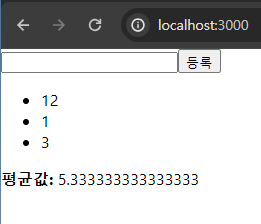


## 8.5 useCallback
- 주로 렌더링 성능을 최적화해야 하는 상황에서 사용
- 컴포넌트의 렌더링이 자주 발생하거나 렌더링해야 할 컴포넌트의 개수가 많아질 때 최적화
---
- useCallback의 첫 번째 파라미터에는 생성하고 싶은 함수를 넣고, 두 번째 파라미터에는 배열을 넣는다.
- 이 배열에는 어떤 값이 바뀌었을 때 함수를 새로 생성해야하는지 명시해야한다.
- onChange 처럼 비어 있는 배열을 넣게 되면 컴포넌트가 렌더링 될 때 만들었던 함수를 계속해서 재사용하게 되며 onInsert처럼 배열 안에 number와 list를 넣게 되면 인풋 내용이 바뀌거나 새로운 항목이 추가될 때 새로 만들어진 함수를 사용
- 함수 내부에서 상태 값에 의존해야 할 때는 그 값을 반드시 두 번째 파라미터 안에 포함시켜 주어야 한다.
```js
import { useState, useMemo, useCallback } from 'react';

const getAverage = numbers => {
    console.log('평균값 계산');
    if (numbers.length === 0) return 0;
    const sum = numbers.reduce((a, b) => a + b);
    return sum / numbers.length;
};

const Average = () => {
    const [list, setList] = useState([]);
    const [number, setNumber] = useState('');

    const onChange = useCallback(e => {
        setNumber(e.target.value)
    }, []) // 컴포넌트가 처음 렌더링 될 때만 함수 생성

    const onInsert = useCallback(() => {
        const nextList = list.concat(parseInt(number))
        setList(nextList)
        setNumber('')
    }, [number, list]) // number 또는 list가 바뀌었을 때만 함수 생성

    const avg = useMemo(() => getAverage(list), [list])

    return (
        <div>
            <input value={number} onChange={onChange} />
            <button onClick={onInsert}>등록</button>
            <ul>
                {list.map((value,index) => (
                    <li key={index}>{value}</li>
                ))}
            </ul>
            <div>
                <b>평균값:</b> {avg}
            </div>
        </div>
    )
};

export default Average;
```

## 8.6 useRef
- 함수 컴포넌트에서 ref를 쉽게 사용할 수 있도록 한다.
- useRef를 사용하여 ref를 설정하면 useRef를 통해 만든 객체 안의 current 값이 실제 엘리먼트를 가리킨다.
- ref 안의 값이 바뀌어도 컴포넌트가 렌더링되지 않는다는 점에 주의
```js
import { useState, useMemo, useCallback, useRef } from 'react';

const getAverage = numbers => {
    console.log('평균값 계산');
    if (numbers.length === 0) return 0;
    const sum = numbers.reduce((a, b) => a + b);
    return sum / numbers.length;
};

const Average = () => {
    const [list, setList] = useState([]);
    const [number, setNumber] = useState('');
    const inputEl = useRef(null)

    const onChange = useCallback(e => {
        setNumber(e.target.value)
    }, [])
    const onInsert = useCallback(() => {
        const nextList = list.concat(parseInt(number))
        setList(nextList)
        setNumber('')
        inputEl.current.focus()
    }, [number, list])

    const avg = useMemo(() => getAverage(list), [list])

    return (
        <div>
            <input value={number} onChange={onChange} ref={inputEl}/>
            <button onClick={onInsert}>등록</button>
            <ul>
                {list.map((value,index) => (
                    <li key={index}>{value}</li>
                ))}
            </ul>
            <div>
                <b>평균값:</b> {avg}
            </div>
        </div>
    )
};

export default Average;
```

## 8.7 커스텀 hooks 만들기
- 여러 컴포넌트에서 비슷한 기능을 공유할 경우, 이를 Hook으로 작성하여 로직을 재사용 가능
- useReducer로 작성했던 로직을 Hook으로 분리
```js
import { useReducer } from 'react';

function reducer(state, action) {
    return {
        ...state,
        [action.name]: action.value
    };
}

export default function useInputs(initialForm) {
    const [state, dispatch] = useReducer(reducer, initialForm);
    const onChange = e => {
        dispatch(e.target);
    };
    return [state, onChange];
}
```
---
```js
import useInputs from './useInputs'

const Info = () => {
    const [state, onChange] = useInputs({
        name:'',
        nickname:''
    })
    const { name, nickname } = state

    return (
        <div>
            <div>
                <input name="name" value={name} onChange={onChange} />      
                <input name="nickname" value={nickname} onChange={onChange} />      
            </div>
            <div>
                <div>
                    <b>이름 :</b> {name}
                </div> 
                <div>
                    <b>닉네임 :</b> {nickname}
                </div> 
            </div>
        </div>
    );
};

export default Info;
```

## 8.8 정리
- Hooks 패턴을 사용하면 클래스형 컴포넌트를 작성하지 않고도 대부분의 기능을 구현할 수 있다.
- 리액트 매뉴얼에 따르면, 기존의 클래스형 컴포넌트는 앞으로도 계속 지원될 예정, 하지만 새로 작성하는 컴포넌트의 경우 함수 컴포넌트와 Hooks를 사용할 것을 권장함